[0.0038398750039061393, 0.18449677409434434, -0.04811850004687357, -0.04625413632851217, 0.014999531264647993, 0.06812144386729302]


<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

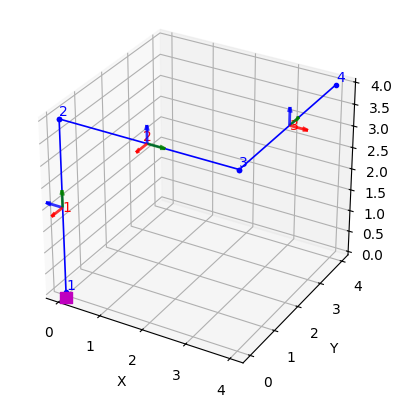

In [5]:
import openseespy.opensees as ops
import opsvis as opsv
# import opensees as ops  # local compilation
# import ops_vis as opsv  # local
import matplotlib.pyplot as plt

ops.wipe()

ops.model('basic', '-ndm', 3, '-ndf', 6)

b = 0.2
h = 0.2

A, Iz, Iy, J = 0.04, 0.0010667, 0.0002667, 0.01172

E = 25.0e6
G = 9615384.6

# Lx, Ly, Lz = 4., 3., 5.
Lx, Ly, Lz = 4., 4., 4.

ops.node(1, 0., 0., 0.)
ops.node(2, 0., 0., Lz)
ops.node(3, Lx, 0., Lz)
ops.node(4, Lx, Ly, Lz)

ops.fix(1, 1, 1, 1, 1, 1, 1)

lmass = 200.

#ops.mass(2, lmass, lmass, lmass, 0.001, 0.001, 0.001)
#ops.mass(3, lmass, lmass, lmass, 0.001, 0.001, 0.001)
#ops.mass(4, lmass, lmass, lmass, 0.001, 0.001, 0.001)

gTTagz = 1
gTTagx = 2
gTTagy = 3

coordTransf = 'Linear'
ops.geomTransf(coordTransf, gTTagz, 0., -1., 0.)
ops.geomTransf(coordTransf, gTTagx, 0., -1., 0.)
ops.geomTransf(coordTransf, gTTagy, 1., 0., 0.)

ops.element('elasticBeamColumn', 1, 1, 2, A, E, G, J, Iy, Iz, gTTagz)
ops.element('elasticBeamColumn', 2, 2, 3, A, E, G, J, Iy, Iz, gTTagx)
ops.element('elasticBeamColumn', 3, 3, 4, A, E, G, J, Iy, Iz, gTTagy)

Ew = {}

Px = -4.e1
Py = -2.5e1
Pz = -3.e1

ops.timeSeries('Constant', 1)
ops.pattern('Plain', 1, 1)
ops.load(4, Px, Py, Pz, 0., 0., 0.)

ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-6, 6, 2)
ops.algorithm('Linear')
ops.integrator('LoadControl', 1)
ops.analysis('Static')
ops.analyze(1)

d1 = ops.nodeDisp(3)
print(d1)



opsv.plot_model()
